<a href="https://colab.research.google.com/github/Duca2020/Introduction-to-Digital-Control/blob/main/Q2_experimental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [415]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [416]:
from scipy.signal import butter, cheby1, filtfilt

# Data Analysis
Os algoritmos abaixo visam uma análise dos dados obtidos pela leitura do sensor da planta motora, vale resaltar que para cada PWM faremos um mesmo conjunto já pré traçado com base no PWM 0.

# PWM 0%

In [417]:
file_path = '/content/degmotor0.dat'

# Read the .dat file into a pandas DataFrame
data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])

<ipython-input-417-04a4fbb5d4d6>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])


In [418]:
# Aqui vamos criar um data framework para cada conjunto:
# tempo x setpoint e tempo x velocidade
# A escolha se justifica pois em malha fechada ambos variam e
# dessa forma precisamos lidar com duas variáveis de forma separada
# (MATLAB consegue separar isso 'por trás dos panos')

data_frame1 = pd.DataFrame()
data_frame2 = pd.DataFrame()

data_frame1['Time'] = data_frame['Time']
data_frame1['Setpoint'] = data_frame['Setpoint']

data_frame2['Time'] = data_frame['Time']
data_frame2['Velocity'] = data_frame['Velocity']

In [419]:
data_frame1.head()

,Time,Setpoint
0,0.1,0.0
1,0.2,0.0
2,0.3,0.0
3,0.4,0.0
4,0.5,0.0


In [420]:
data_frame2.head()

,Time,Velocity
0,0.1,0.0
1,0.2,0.0
2,0.3,0.0
3,0.4,0.0
4,0.5,0.0


In [421]:
pwm0_data = {}

N = 15 #numero de amostrar para computar a media
t_sampling = 0.1

#obtendo o valor medio
pwm0_data['median'] = 1/N*sum(data_frame2['Velocity'].tail(N))

#obtendo o instante de tempo onde atinge a velocidade final (media anterior) pela primeira vez
pwm0_data['response_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm0_data['median']).idxmax()

# obtendo a constante de tempo da planta
pwm0_data['time_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm0_data['median']*0.639).idxmax()

#obtendo o tempo de assentamento no criterio de 2%
pwm0_data['settling time'] = t_sampling*data_frame2['Velocity'].ge(pwm0_data['median']*0.98).idxmax()

#otendo o overshoot em %
pwm0_data['overshoot'] = (data_frame2['Velocity'].max()-pwm0_data['median'])/pwm0_data['median']*100

# obtendo o ganho DC
pwm0_data['DC gain'] = pwm0_data['median']/data_frame1['Setpoint'][0]

<ipython-input-421-08e945472ea4>:19: RuntimeWarning: invalid value encountered in scalar divide
  pwm0_data['overshoot'] = (data_frame2['Velocity'].max()-pwm0_data['median'])/pwm0_data['median']*100
<ipython-input-421-08e945472ea4>:22: RuntimeWarning: invalid value encountered in scalar divide
  pwm0_data['DC gain'] = pwm0_data['median']/data_frame1['Setpoint'][0]


In [422]:
pwm0_data

{'median': 0.0,
 'response_constant': 0.0,
 'time_constant': 0.0,
 'settling time': 0.0,
 'overshoot': nan,
 'DC gain': nan}

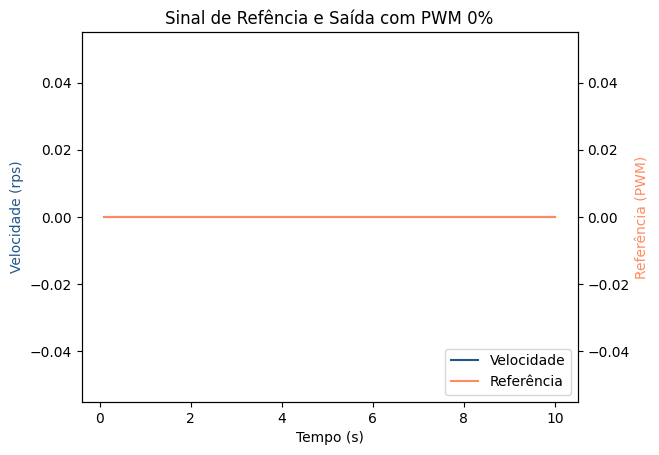

In [423]:
x = data_frame['Time'] #eh o mesmo tempo para todos
f0 = data_frame1['Setpoint']
g0 = data_frame2['Velocity']


fig, ax1 = plt.subplots()

# Plot the first function on the left Y-axis
ax1.plot(x, g0, linestyle='-',color='#235789', label='Velocidade')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Velocidade (rps)', color='#235789')

# Create the second Y-axis
ax2 = ax1.twinx()

# Plot the second function on the right Y-axis
ax2.plot(x, f0, linestyle='-',color='#FF8C61', label='Referência')
ax2.set_ylabel('Referência (PWM)', color='#FF8C61')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

# Show the plot
plt.title('Sinal de Refência e Saída com PWM 0%')
plt.show()

Text(0.5, 1.0, 'Distribuição de velocidade com PWM 0%')

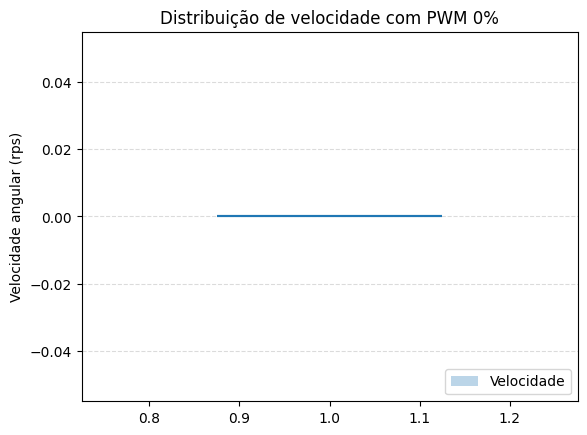

In [424]:
plt.violinplot(data_frame2['Velocity'])
plt.grid(True, axis='y', linestyle='--', color='lightgray', alpha=0.8)
#plt.xlabel('Tempo (s)') Será????
plt.ylabel('Velocidade angular (rps)')
plt.legend(['Velocidade'], loc='lower right')
plt.title('Distribuição de velocidade com PWM 0%')

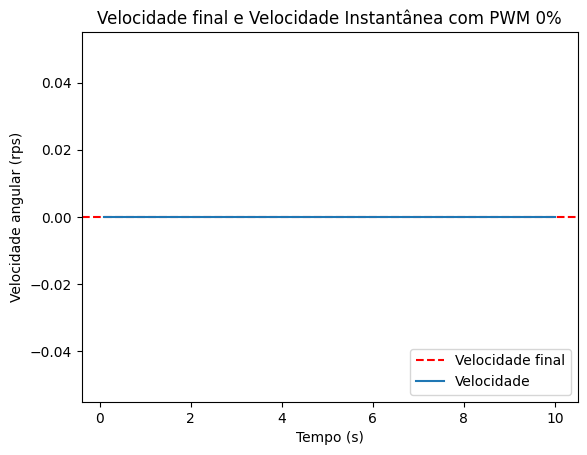

In [425]:
plt.axhline(y=pwm0_data['median'], color='r', linestyle='--')
plt.plot(data_frame2['Time'], data_frame2['Velocity'])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade angular (rps)')
plt.legend(['Velocidade final', 'Velocidade'], loc='lower right')
plt.title('Velocidade final e Velocidade Instantânea com PWM 0%')
plt.show()

# PWM 10%

In [426]:
file_path = '/content/degmotor10.dat'

# Read the .dat file into a pandas DataFrame
data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])

<ipython-input-426-d13a61db7d58>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])


In [427]:
# Aqui vamos criar um data framework para cada conjunto:
# tempo x setpoint e tempo x velocidade
# A escolha se justifica pois em malha fechada ambos variam e
# dessa forma precisamos lidar com duas variáveis de forma separada
# (MATLAB consegue separar isso 'por trás dos panos')

data_frame1 = pd.DataFrame()
data_frame2 = pd.DataFrame()

data_frame1['Time'] = data_frame['Time']
data_frame1['Setpoint'] = data_frame['Setpoint']

data_frame2['Time'] = data_frame['Time']
data_frame2['Velocity'] = data_frame['Velocity']

In [428]:
data_frame1.head()

,Time,Setpoint
0,0.1,10.0
1,0.2,10.0
2,0.3,10.0
3,0.4,10.0
4,0.5,10.0


In [429]:
data_frame2.head()

,Time,Velocity
0,0.1,0.0
1,0.2,0.0
2,0.3,0.0
3,0.4,0.0
4,0.5,0.0


In [430]:
pwm10_data = {}

N = 15 #numero de amostrar para computar a media
t_sampling = 0.1

#obtendo o valor medio
pwm10_data['median'] = 1/N*sum(data_frame2['Velocity'].tail(N))

#obtendo o instante de tempo onde atinge a velocidade final (media anterior) pela primeira vez
pwm10_data['response_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm10_data['median']).idxmax()

# obtendo a constante de tempo da planta
pwm10_data['time_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm10_data['median']*0.639).idxmax()

#obtendo o tempo de assentamento no criterio de 2%
pwm10_data['settling time'] = t_sampling*data_frame2['Velocity'].ge(pwm10_data['median']*0.98).idxmax()

#otendo o overshoot em %
pwm10_data['overshoot'] = (data_frame2['Velocity'].max()-pwm10_data['median'])/pwm10_data['median']*100

# obtendo o ganho DC
pwm10_data['DC gain'] = pwm10_data['median']/data_frame1['Setpoint'][0]

<ipython-input-430-1defc9321e87>:19: RuntimeWarning: invalid value encountered in scalar divide
  pwm10_data['overshoot'] = (data_frame2['Velocity'].max()-pwm10_data['median'])/pwm10_data['median']*100


In [431]:
pwm10_data

{'median': 0.0,
 'response_constant': 0.0,
 'time_constant': 0.0,
 'settling time': 0.0,
 'overshoot': nan,
 'DC gain': 0.0}

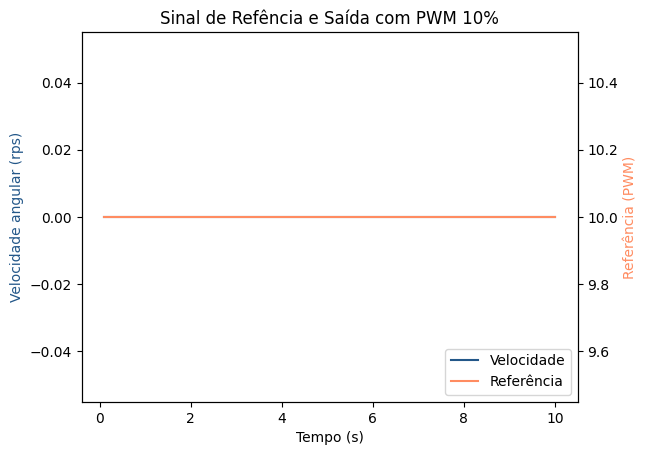

In [432]:
x = data_frame['Time'] #eh o mesmo tempo para todos
f10 = data_frame1['Setpoint']
g10 = data_frame2['Velocity']


fig, ax1 = plt.subplots()

# Plot the first function on the left Y-axis
ax1.plot(x, g10, linestyle='-',color='#235789', label='Velocidade')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Velocidade angular (rps)', color='#235789')

# Create the second Y-axis
ax2 = ax1.twinx()

# Plot the second function on the right Y-axis
ax2.plot(x, f10, linestyle='-',color='#FF8C61', label='Referência')
ax2.set_ylabel('Referência (PWM)', color='#FF8C61')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

# Show the plot
plt.title('Sinal de Refência e Saída com PWM 10%')
plt.show()

Text(0.5, 1.0, 'Distribuição de velocidade com PWM 10%')

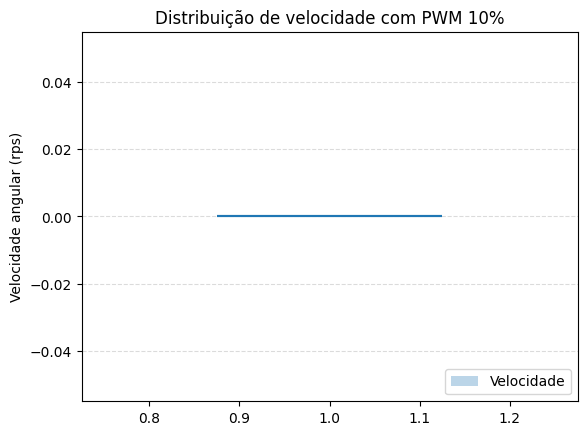

In [433]:
plt.violinplot(data_frame2['Velocity'])
plt.grid(True, axis='y', linestyle='--', color='lightgray', alpha=0.8)
#plt.xlabel('Tempo (s)') Será????
plt.ylabel('Velocidade angular (rps)')
plt.legend(['Velocidade'], loc='lower right')
plt.title('Distribuição de velocidade com PWM 10%')

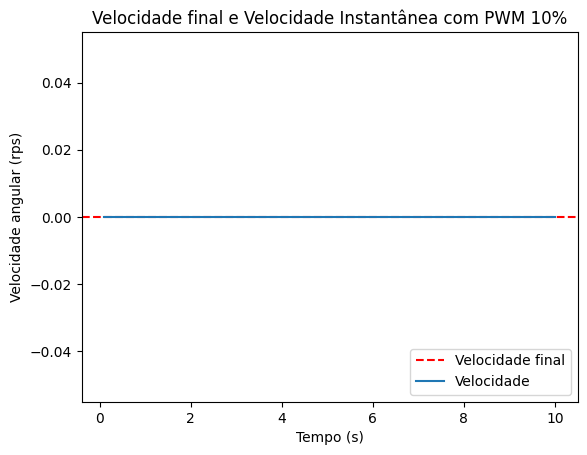

In [434]:
plt.axhline(y=pwm10_data['median'], color='r', linestyle='--')
plt.plot(data_frame2['Time'], data_frame2['Velocity'])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade angular (rps)')
plt.legend(['Velocidade final', 'Velocidade'], loc='lower right')
plt.title('Velocidade final e Velocidade Instantânea com PWM 10%')
plt.show()

# PWM 20%

In [435]:
file_path = '/content/degmotor20.dat'

# Read the .dat file into a pandas DataFrame
data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])

<ipython-input-435-53de3adf7ac0>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])


In [436]:
# Aqui vamos criar um data framework para cada conjunto:
# tempo x setpoint e tempo x velocidade
# A escolha se justifica pois em malha fechada ambos variam e
# dessa forma precisamos lidar com duas variáveis de forma separada
# (MATLAB consegue separar isso 'por trás dos panos')

data_frame1 = pd.DataFrame()
data_frame2 = pd.DataFrame()

data_frame1['Time'] = data_frame['Time']
data_frame1['Setpoint'] = data_frame['Setpoint']

data_frame2['Time'] = data_frame['Time']
data_frame2['Velocity'] = data_frame['Velocity']

In [437]:
data_frame1.head()

,Time,Setpoint
0,0.1,20.0
1,0.2,20.0
2,0.3,20.0
3,0.4,20.0
4,0.5,20.0


In [438]:
data_frame2.head()

,Time,Velocity
0,0.1,0.00
1,0.2,0.00
2,0.3,0.00
3,0.4,4.08
4,0.5,7.35


In [439]:
pwm20_data = {}

N = 15 #numero de amostrar para computar a media
t_sampling = 0.1

#obtendo o valor medio
pwm20_data['median'] = 1/N*sum(data_frame2['Velocity'].tail(N))

#obtendo o instante de tempo onde atinge a velocidade final (media anterior) pela primeira vez
pwm20_data['response_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm20_data['median']).idxmax()

# obtendo a constante de tempo da planta
pwm20_data['time_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm20_data['median']*0.639).idxmax()

#obtendo o tempo de assentamento no criterio de 2%
pwm20_data['settling time'] = t_sampling*data_frame2['Velocity'].ge(pwm20_data['median']*0.98).idxmax()

#otendo o overshoot em %
pwm20_data['overshoot'] = (data_frame2['Velocity'].max()-pwm20_data['median'])/pwm20_data['median']*100

# obtendo o ganho DC
pwm20_data['DC gain'] = pwm20_data['median']/data_frame1['Setpoint'][0]

In [440]:
pwm20_data

{'median': 34.326666666666654,
 'response_constant': 3.5,
 'time_constant': 1.1,
 'settling time': 3.5,
 'overshoot': 4.758205476791652,
 'DC gain': 1.7163333333333326}

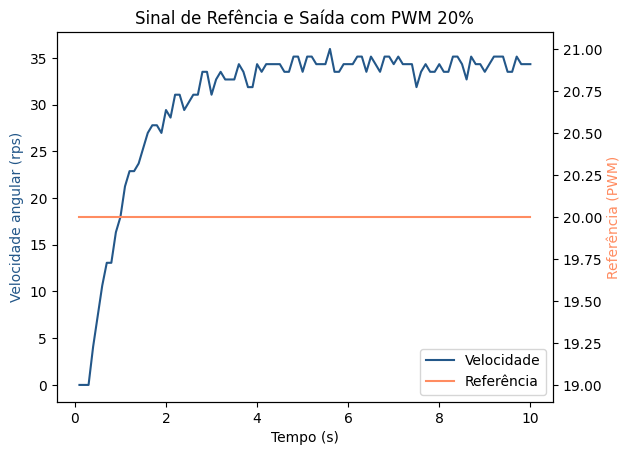

In [441]:
x = data_frame['Time'] #eh o mesmo tempo para todos
f20 = data_frame1['Setpoint']
g20 = data_frame2['Velocity']


fig, ax1 = plt.subplots()

# Plot the first function on the left Y-axis
ax1.plot(x, g20, linestyle='-',color='#235789', label='Velocidade')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Velocidade angular (rps)', color='#235789')

# Create the second Y-axis
ax2 = ax1.twinx()

# Plot the second function on the right Y-axis
ax2.plot(x, f20, linestyle='-',color='#FF8C61', label='Referência')
ax2.set_ylabel('Referência (PWM)', color='#FF8C61')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

# Show the plot
plt.title('Sinal de Refência e Saída com PWM 20%')
plt.show()

Text(0.5, 1.0, 'Distribuição de velocidade com PWM 20%')

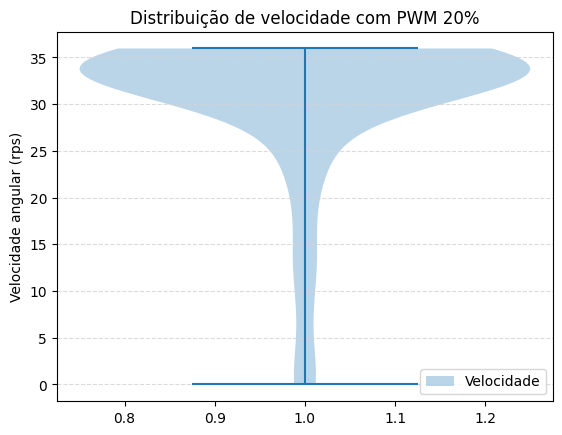

In [442]:
plt.violinplot(data_frame2['Velocity'])
plt.grid(True, axis='y', linestyle='--', color='lightgray', alpha=0.8)
#plt.xlabel('Tempo (s)') Será????
plt.ylabel('Velocidade angular (rps)')
plt.legend(['Velocidade'], loc='lower right')
plt.title('Distribuição de velocidade com PWM 20%')

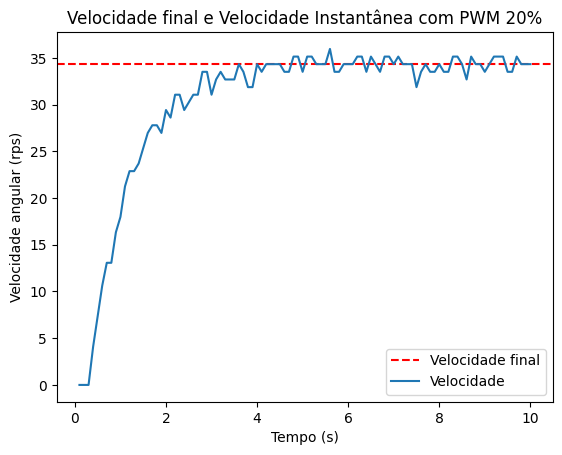

In [443]:
plt.axhline(y=pwm20_data['median'], color='r', linestyle='--')
plt.plot(data_frame2['Time'], data_frame2['Velocity'])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade angular (rps)')
plt.legend(['Velocidade final', 'Velocidade'], loc='lower right')
plt.title('Velocidade final e Velocidade Instantânea com PWM 20%')
plt.show()

# PWM 30%

In [444]:
file_path = '/content/degmotor30.dat'

# Read the .dat file into a pandas DataFrame
data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])

<ipython-input-444-b2bae8584d0f>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])


In [445]:
# Aqui vamos criar um data framework para cada conjunto:
# tempo x setpoint e tempo x velocidade
# A escolha se justifica pois em malha fechada ambos variam e
# dessa forma precisamos lidar com duas variáveis de forma separada
# (MATLAB consegue separar isso 'por trás dos panos')

data_frame1 = pd.DataFrame()
data_frame2 = pd.DataFrame()

data_frame1['Time'] = data_frame['Time']
data_frame1['Setpoint'] = data_frame['Setpoint']

data_frame2['Time'] = data_frame['Time']
data_frame2['Velocity'] = data_frame['Velocity']

In [446]:
data_frame1.head()

,Time,Setpoint
0,0.1,30.0
1,0.2,30.0
2,0.3,30.0
3,0.4,30.0
4,0.5,30.0


In [447]:
data_frame2.head()

,Time,Velocity
0,0.1,0.00
1,0.2,0.00
2,0.3,1.63
3,0.4,8.99
4,0.5,14.71


In [448]:
pwm30_data = {}

N = 15 #numero de amostrar para computar a media
t_sampling = 0.1

#obtendo o valor medio
pwm30_data['median'] = 1/N*sum(data_frame2['Velocity'].tail(N))

#obtendo o instante de tempo onde atinge a velocidade final (media anterior) pela primeira vez
pwm30_data['response_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm30_data['median']).idxmax()

# obtendo a constante de tempo da planta
pwm30_data['time_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm30_data['median']*0.639).idxmax()

#obtendo o tempo de assentamento no criterio de 2%
pwm30_data['settling time'] = t_sampling*data_frame2['Velocity'].ge(pwm30_data['median']*0.98).idxmax()

#otendo o overshoot em %
pwm30_data['overshoot'] = (data_frame2['Velocity'].max()-pwm30_data['median'])/pwm30_data['median']*100

# obtendo o ganho DC
pwm30_data['DC gain'] = pwm30_data['median']/data_frame1['Setpoint'][0]

In [449]:
pwm30_data

{'median': 43.31933333333333,
 'response_constant': 2.9000000000000004,
 'time_constant': 0.9,
 'settling time': 2.5,
 'overshoot': 7.550131580972323,
 'DC gain': 1.4439777777777778}

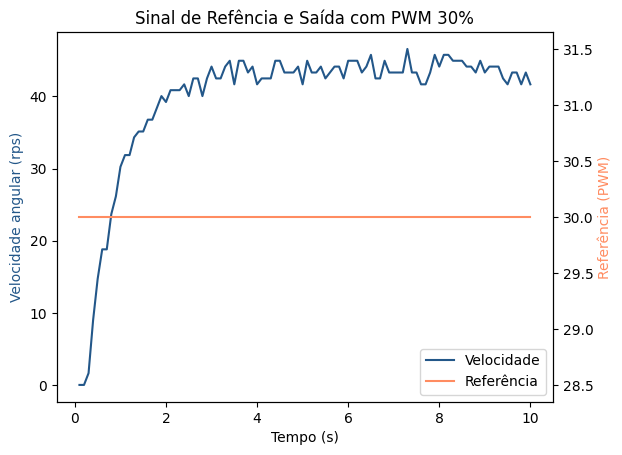

In [450]:
x = data_frame['Time'] #eh o mesmo tempo para todos
f30 = data_frame1['Setpoint']
g30 = data_frame2['Velocity']


fig, ax1 = plt.subplots()

# Plot the first function on the left Y-axis
ax1.plot(x, g30, linestyle='-',color='#235789', label='Velocidade')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Velocidade angular (rps)', color='#235789')

# Create the second Y-axis
ax2 = ax1.twinx()

# Plot the second function on the right Y-axis
ax2.plot(x, f30, linestyle='-',color='#FF8C61', label='Referência')
ax2.set_ylabel('Referência (PWM)', color='#FF8C61')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

# Show the plot
plt.title('Sinal de Refência e Saída com PWM 30%')
plt.show()

Text(0.5, 1.0, 'Distribuição de velocidade com PWM 30%')

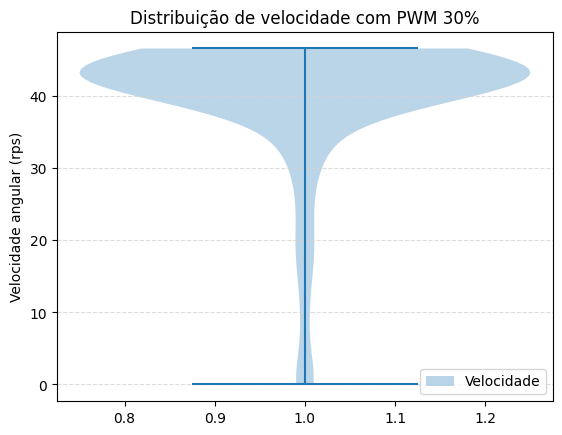

In [451]:
plt.violinplot(data_frame2['Velocity'])
plt.grid(True, axis='y', linestyle='--', color='lightgray', alpha=0.8)
#plt.xlabel('Tempo (s)') Será????
plt.ylabel('Velocidade angular (rps)')
plt.legend(['Velocidade'], loc='lower right')
plt.title('Distribuição de velocidade com PWM 30%')

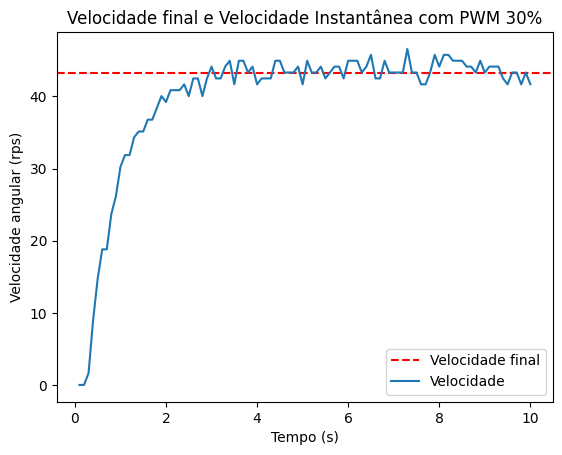

In [452]:
plt.axhline(y=pwm30_data['median'], color='r', linestyle='--')
plt.plot(data_frame2['Time'], data_frame2['Velocity'])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade angular (rps)')
plt.legend(['Velocidade final', 'Velocidade'], loc='lower right')
plt.title('Velocidade final e Velocidade Instantânea com PWM 30%')
plt.show()

# PWM 40%

In [453]:
file_path = '/content/degmotor40.dat'

# Read the .dat file into a pandas DataFrame
data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])

<ipython-input-453-fa65bd6878fb>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])


In [454]:
# Aqui vamos criar um data framework para cada conjunto:
# tempo x setpoint e tempo x velocidade
# A escolha se justifica pois em malha fechada ambos variam e
# dessa forma precisamos lidar com duas variáveis de forma separada
# (MATLAB consegue separar isso 'por trás dos panos')

data_frame1 = pd.DataFrame()
data_frame2 = pd.DataFrame()

data_frame1['Time'] = data_frame['Time']
data_frame1['Setpoint'] = data_frame['Setpoint']

data_frame2['Time'] = data_frame['Time']
data_frame2['Velocity'] = data_frame['Velocity']

In [455]:
data_frame1.head()

,Time,Setpoint
0,0.1,40.0
1,0.2,40.0
2,0.3,40.0
3,0.4,40.0
4,0.5,40.0


In [456]:
data_frame2.head()

,Time,Velocity
0,0.1,0.00
1,0.2,0.00
2,0.3,4.08
3,0.4,4.08
4,0.5,12.26


In [457]:
pwm40_data = {}

N = 15 #numero de amostrar para computar a media
t_sampling = 0.1

#obtendo o valor medio
pwm40_data['median'] = 1/N*sum(data_frame2['Velocity'].tail(N))

#obtendo o instante de tempo onde atinge a velocidade final (media anterior) pela primeira vez
pwm40_data['response_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm40_data['median']).idxmax()

# obtendo a constante de tempo da planta
pwm40_data['time_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm40_data['median']*0.639).idxmax()

#obtendo o tempo de assentamento no criterio de 2%
pwm40_data['settling time'] = t_sampling*data_frame2['Velocity'].ge(pwm40_data['median']*0.98).idxmax()

#otendo o overshoot em %
pwm40_data['overshoot'] = (data_frame2['Velocity'].max()-pwm40_data['median'])/pwm40_data['median']*100

# obtendo o ganho DC
pwm40_data['DC gain'] = pwm40_data['median']/data_frame1['Setpoint'][0]

In [458]:
pwm40_data

{'median': 54.11,
 'response_constant': 3.5,
 'time_constant': 0.9,
 'settling time': 2.7,
 'overshoot': 4.232119756052484,
 'DC gain': 1.35275}

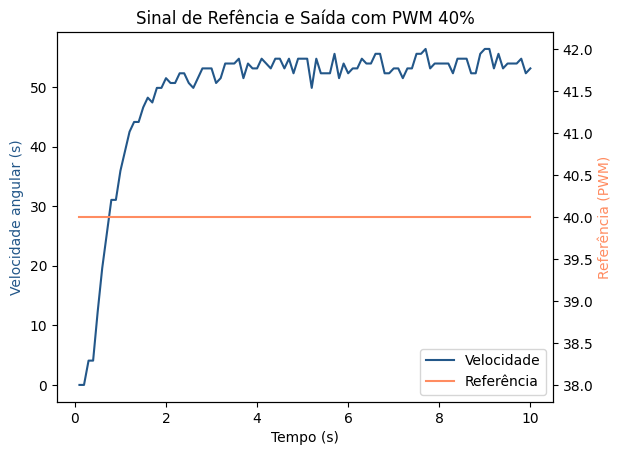

In [459]:
x = data_frame['Time'] #eh o mesmo tempo para todos
f40 = data_frame1['Setpoint']
g40 = data_frame2['Velocity']


fig, ax1 = plt.subplots()

# Plot the first function on the left Y-axis
ax1.plot(x, g40, linestyle='-',color='#235789', label='Velocidade')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Velocidade angular (s)', color='#235789')

# Create the second Y-axis
ax2 = ax1.twinx()

# Plot the second function on the right Y-axis
ax2.plot(x, f40, linestyle='-',color='#FF8C61', label='Referência')
ax2.set_ylabel('Referência (PWM)', color='#FF8C61')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

# Show the plot
plt.title('Sinal de Refência e Saída com PWM 40%')
plt.show()

Text(0.5, 1.0, 'Distribuição de velocidade com PWM 40%')

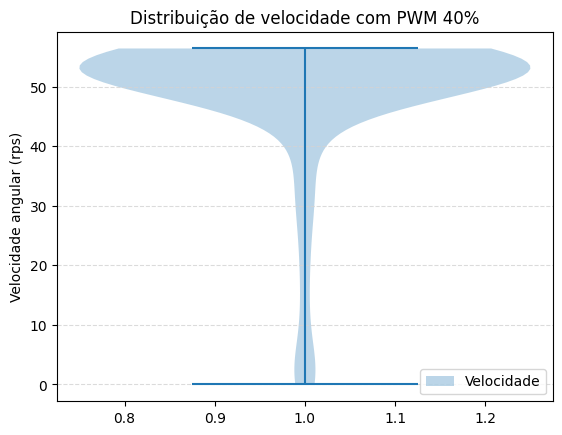

In [460]:
plt.violinplot(data_frame2['Velocity'])
plt.grid(True, axis='y', linestyle='--', color='lightgray', alpha=0.8)
#plt.xlabel('Tempo (s)') Será????
plt.ylabel('Velocidade angular (rps)')
plt.legend(['Velocidade'], loc='lower right')
plt.title('Distribuição de velocidade com PWM 40%')

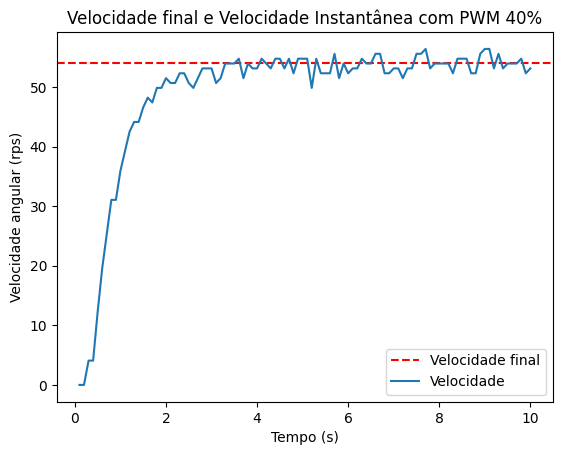

In [461]:
plt.axhline(y=pwm40_data['median'], color='r', linestyle='--')
plt.plot(data_frame2['Time'], data_frame2['Velocity'])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade angular (rps)')
plt.legend(['Velocidade final', 'Velocidade'], loc='lower right')
plt.title('Velocidade final e Velocidade Instantânea com PWM 40%')
plt.show()

# PWM 50%

In [462]:
file_path = '/content/degmotor50.dat'

# Read the .dat file into a pandas DataFrame
data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])

<ipython-input-462-7664061fc992>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])


In [463]:
# Aqui vamos criar um data framework para cada conjunto:
# tempo x setpoint e tempo x velocidade
# A escolha se justifica pois em malha fechada ambos variam e
# dessa forma precisamos lidar com duas variáveis de forma separada
# (MATLAB consegue separar isso 'por trás dos panos')

data_frame1 = pd.DataFrame()
data_frame2 = pd.DataFrame()

data_frame1['Time'] = data_frame['Time']
data_frame1['Setpoint'] = data_frame['Setpoint']

data_frame2['Time'] = data_frame['Time']
data_frame2['Velocity'] = data_frame['Velocity']

In [464]:
data_frame1.head()

,Time,Setpoint
0,0.1,50.0
1,0.2,50.0
2,0.3,50.0
3,0.4,50.0
4,0.5,50.0


In [465]:
data_frame2.head()

,Time,Velocity
0,0.1,0.00
1,0.2,0.00
2,0.3,8.99
3,0.4,18.80
4,0.5,26.97


In [466]:
pwm50_data = {}

N = 15 #numero de amostrar para computar a media
t_sampling = 0.1

#obtendo o valor medio
pwm50_data['median'] = 1/N*sum(data_frame2['Velocity'].tail(N))

#obtendo o instante de tempo onde atinge a velocidade final (media anterior) pela primeira vez
pwm50_data['response_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm50_data['median']).idxmax()

# obtendo a constante de tempo da planta
pwm50_data['time_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm50_data['median']*0.639).idxmax()

#obtendo o tempo de assentamento no criterio de 2%
pwm50_data['settling time'] = t_sampling*data_frame2['Velocity'].ge(pwm50_data['median']*0.98).idxmax()

#otendo o overshoot em %
pwm50_data['overshoot'] = (data_frame2['Velocity'].max()-pwm50_data['median'])/pwm50_data['median']*100

# obtendo o ganho DC
pwm50_data['DC gain'] = pwm50_data['median']/data_frame1['Setpoint'][0]

In [467]:
pwm50_data

{'median': 63.64533333333333,
 'response_constant': 2.2,
 'time_constant': 0.8,
 'settling time': 2.2,
 'overshoot': 6.590690074160981,
 'DC gain': 1.2729066666666666}

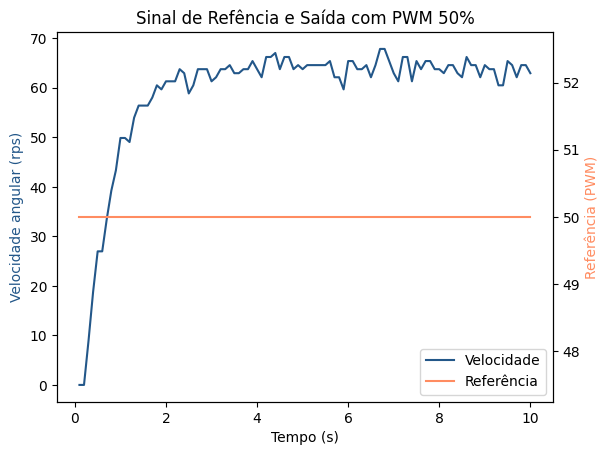

In [468]:
x = data_frame['Time'] #eh o mesmo tempo para todos
f50 = data_frame1['Setpoint']
g50 = data_frame2['Velocity']


fig, ax1 = plt.subplots()

# Plot the first function on the left Y-axis
ax1.plot(x, g50, linestyle='-',color='#235789', label='Velocidade')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Velocidade angular (rps)', color='#235789')

# Create the second Y-axis
ax2 = ax1.twinx()

# Plot the second function on the right Y-axis
ax2.plot(x, f50, linestyle='-',color='#FF8C61', label='Referência')
ax2.set_ylabel('Referência (PWM)', color='#FF8C61')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

# Show the plot
plt.title('Sinal de Refência e Saída com PWM 50%')
plt.show()

Text(0.5, 1.0, 'Distribuição de velocidade com PWM 50%')

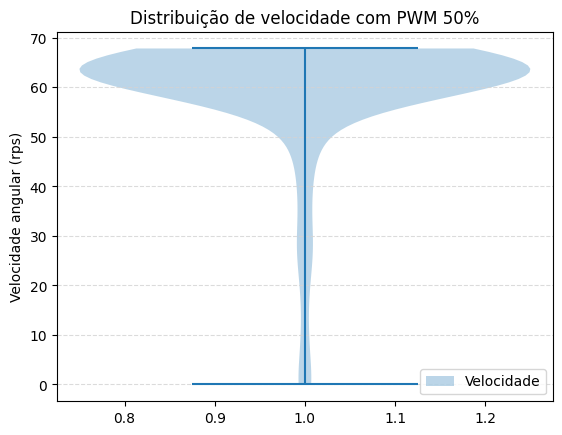

In [469]:
plt.violinplot(data_frame2['Velocity'])
plt.grid(True, axis='y', linestyle='--', color='lightgray', alpha=0.8)
#plt.xlabel('Tempo (s)') Será????
plt.ylabel('Velocidade angular (rps)')
plt.legend(['Velocidade'], loc='lower right')
plt.title('Distribuição de velocidade com PWM 50%')

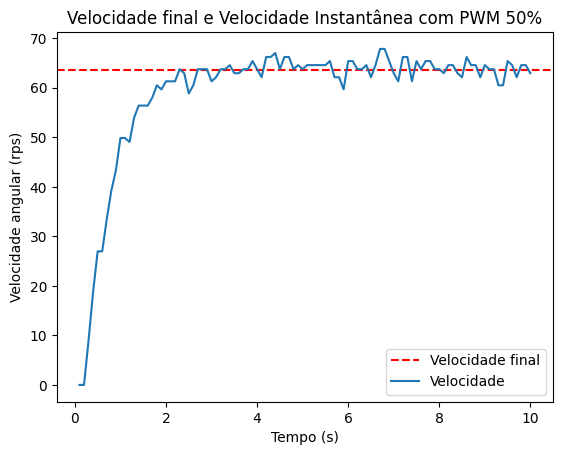

In [470]:
plt.axhline(y=pwm50_data['median'], color='r', linestyle='--')
plt.plot(data_frame2['Time'], data_frame2['Velocity'])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade angular (rps)')
plt.legend(['Velocidade final', 'Velocidade'], loc='lower right')
plt.title('Velocidade final e Velocidade Instantânea com PWM 50%')
plt.show()

# PWM 60%

In [471]:
file_path = '/content/degmotor60.dat'

# Read the .dat file into a pandas DataFrame
data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])

<ipython-input-471-e5c334d4a570>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])


In [472]:
# Aqui vamos criar um data framework para cada conjunto:
# tempo x setpoint e tempo x velocidade
# A escolha se justifica pois em malha fechada ambos variam e
# dessa forma precisamos lidar com duas variáveis de forma separada
# (MATLAB consegue separar isso 'por trás dos panos')

data_frame1 = pd.DataFrame()
data_frame2 = pd.DataFrame()

data_frame1['Time'] = data_frame['Time']
data_frame1['Setpoint'] = data_frame['Setpoint']

data_frame2['Time'] = data_frame['Time']
data_frame2['Velocity'] = data_frame['Velocity']

In [473]:
data_frame1.head()

,Time,Setpoint
0,0.1,60.0
1,0.2,60.0
2,0.3,60.0
3,0.4,60.0
4,0.5,60.0


In [474]:
data_frame2.head()

,Time,Velocity
0,0.1,0.00
1,0.2,0.00
2,0.3,8.17
3,0.4,19.61
4,0.5,19.61


In [475]:
pwm60_data = {}

N = 15 #numero de amostrar para computar a media
t_sampling = 0.1

#obtendo o valor medio
pwm60_data['median'] = 1/N*sum(data_frame2['Velocity'].tail(N))

#obtendo o instante de tempo onde atinge a velocidade final (media anterior) pela primeira vez
pwm60_data['response_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm60_data['median']).idxmax()

# obtendo a constante de tempo da planta
pwm60_data['time_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm60_data['median']*0.639).idxmax()

#obtendo o tempo de assentamento no criterio de 2%
pwm60_data['settling time'] = t_sampling*data_frame2['Velocity'].ge(pwm60_data['median']*0.98).idxmax()

#otendo o overshoot em %
pwm60_data['overshoot'] = (data_frame2['Velocity'].max()-pwm60_data['median'])/pwm60_data['median']*100

# obtendo o ganho DC
pwm60_data['DC gain'] = pwm60_data['median']/data_frame1['Setpoint'][0]

In [476]:
pwm60_data

{'median': 73.182,
 'response_constant': 1.9000000000000001,
 'time_constant': 0.8,
 'settling time': 1.7000000000000002,
 'overshoot': 4.984832335820278,
 'DC gain': 1.2197}

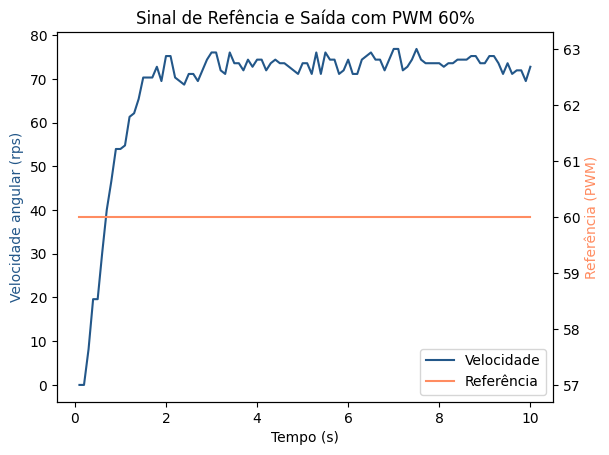

In [477]:
x = data_frame['Time'] #eh o mesmo tempo para todos
f60 = data_frame1['Setpoint']
g60 = data_frame2['Velocity']


fig, ax1 = plt.subplots()

# Plot the first function on the left Y-axis
ax1.plot(x, g60, linestyle='-',color='#235789', label='Velocidade')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Velocidade angular (rps)', color='#235789')

# Create the second Y-axis
ax2 = ax1.twinx()

# Plot the second function on the right Y-axis
ax2.plot(x, f60, linestyle='-',color='#FF8C61', label='Referência')
ax2.set_ylabel('Referência (PWM)', color='#FF8C61')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

# Show the plot
plt.title('Sinal de Refência e Saída com PWM 60%')
plt.show()

Text(0.5, 1.0, 'Distribuição de velocidade com PWM 60%')

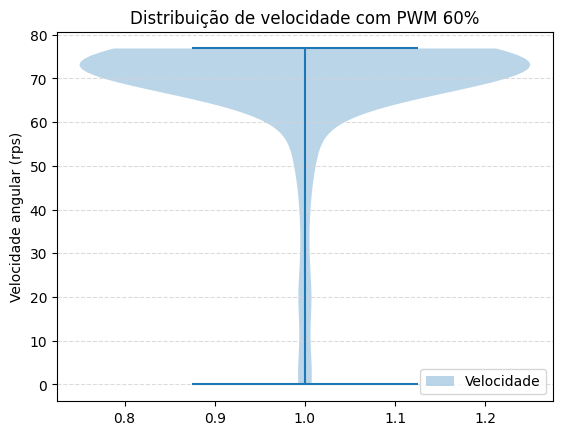

In [478]:
plt.violinplot(data_frame2['Velocity'])
plt.grid(True, axis='y', linestyle='--', color='lightgray', alpha=0.8)
#plt.xlabel('Tempo (s)') Será????
plt.ylabel('Velocidade angular (rps)')
plt.legend(['Velocidade'], loc='lower right')
plt.title('Distribuição de velocidade com PWM 60%')

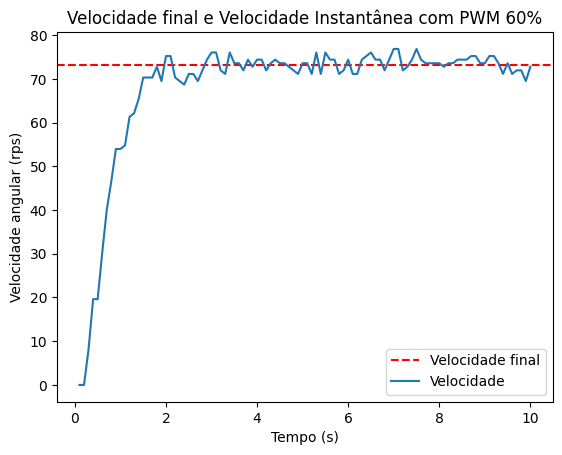

In [479]:
plt.axhline(y=pwm60_data['median'], color='r', linestyle='--')
plt.plot(data_frame2['Time'], data_frame2['Velocity'])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade angular (rps)')
plt.legend(['Velocidade final', 'Velocidade'], loc='lower right')
plt.title('Velocidade final e Velocidade Instantânea com PWM 60%')
plt.show()

# PWM 70%

In [480]:
file_path = '/content/degmotor70.dat'

# Read the .dat file into a pandas DataFrame
data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])

<ipython-input-480-036aa6c63b77>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])


In [481]:
# Aqui vamos criar um data framework para cada conjunto:
# tempo x setpoint e tempo x velocidade
# A escolha se justifica pois em malha fechada ambos variam e
# dessa forma precisamos lidar com duas variáveis de forma separada
# (MATLAB consegue separar isso 'por trás dos panos')

data_frame1 = pd.DataFrame()
data_frame2 = pd.DataFrame()

data_frame1['Time'] = data_frame['Time']
data_frame1['Setpoint'] = data_frame['Setpoint']

data_frame2['Time'] = data_frame['Time']
data_frame2['Velocity'] = data_frame['Velocity']

In [482]:
data_frame1.head()

,Time,Setpoint
0,0.1,70.0
1,0.2,70.0
2,0.3,70.0
3,0.4,70.0
4,0.5,70.0


In [483]:
data_frame2.head()

,Time,Velocity
0,0.1,0.00
1,0.2,1.63
2,0.3,1.63
3,0.4,17.16
4,0.5,30.24


In [484]:
pwm70_data = {}

N = 15 #numero de amostrar para computar a media
t_sampling = 0.1

#obtendo o valor medio
pwm70_data['median'] = 1/N*sum(data_frame2['Velocity'].tail(N))

#obtendo o instante de tempo onde atinge a velocidade final (media anterior) pela primeira vez
pwm70_data['response_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm70_data['median']).idxmax()

# obtendo a constante de tempo da planta
pwm70_data['time_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm70_data['median']*0.639).idxmax()

#obtendo o tempo de assentamento no criterio de 2%
pwm70_data['settling time'] = t_sampling*data_frame2['Velocity'].ge(pwm70_data['median']*0.98).idxmax()

#otendo o overshoot em %
pwm70_data['overshoot'] = (data_frame2['Velocity'].max()-pwm70_data['median'])/pwm70_data['median']*100

# obtendo o ganho DC
pwm70_data['DC gain'] = pwm70_data['median']/data_frame1['Setpoint'][0]

In [485]:
pwm70_data

{'median': 79.66733333333335,
 'response_constant': 1.7000000000000002,
 'time_constant': 0.6000000000000001,
 'settling time': 1.6,
 'overshoot': 6.706220031631524,
 'DC gain': 1.1381047619047622}

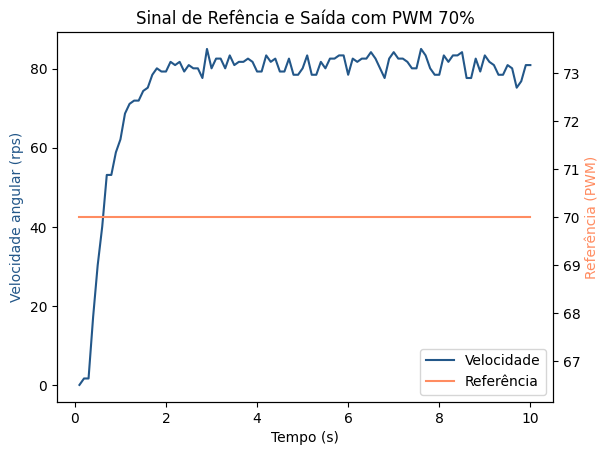

In [486]:
x = data_frame['Time'] #eh o mesmo tempo para todos
f70 = data_frame1['Setpoint']
g70 = data_frame2['Velocity']


fig, ax1 = plt.subplots()

# Plot the first function on the left Y-axis
ax1.plot(x, g70, linestyle='-',color='#235789', label='Velocidade')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Velocidade angular (rps)', color='#235789')

# Create the second Y-axis
ax2 = ax1.twinx()

# Plot the second function on the right Y-axis
ax2.plot(x, f70, linestyle='-',color='#FF8C61', label='Referência')
ax2.set_ylabel('Referência (PWM)', color='#FF8C61')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

# Show the plot
plt.title('Sinal de Refência e Saída com PWM 70%')
plt.show()

Text(0.5, 1.0, 'Distribuição de velocidade com PWM 70%')

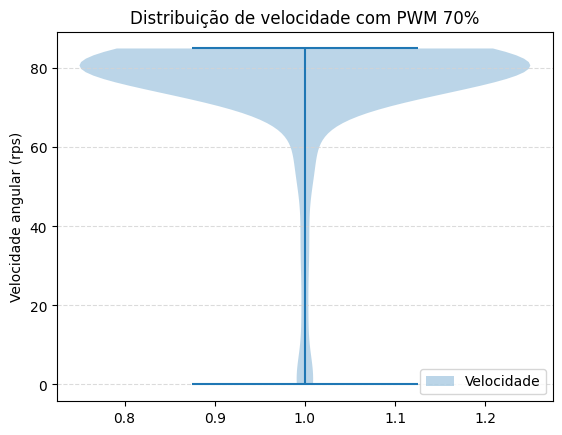

In [487]:
plt.violinplot(data_frame2['Velocity'])
plt.grid(True, axis='y', linestyle='--', color='lightgray', alpha=0.8)
#plt.xlabel('Tempo (s)') Será????
plt.ylabel('Velocidade angular (rps)')
plt.legend(['Velocidade'], loc='lower right')
plt.title('Distribuição de velocidade com PWM 70%')

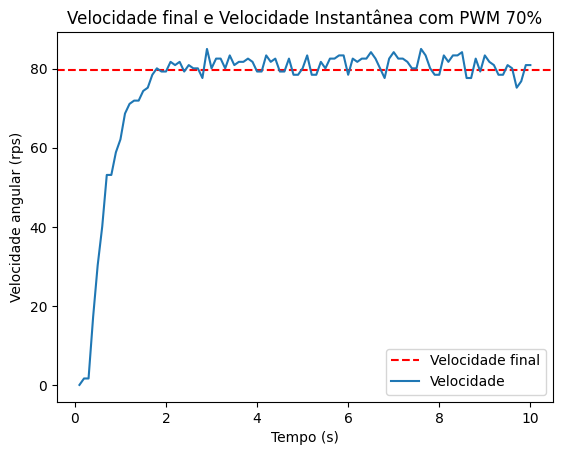

In [488]:
plt.axhline(y=pwm70_data['median'], color='r', linestyle='--')
plt.plot(data_frame2['Time'], data_frame2['Velocity'])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade angular (rps)')
plt.legend(['Velocidade final', 'Velocidade'], loc='lower right')
plt.title('Velocidade final e Velocidade Instantânea com PWM 70%')
plt.show()

# PWM 80%

In [489]:
file_path = '/content/degmotor80.dat'

# Read the .dat file into a pandas DataFrame
data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])

<ipython-input-489-b5401315e3f7>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])


In [490]:
# Aqui vamos criar um data framework para cada conjunto:
# tempo x setpoint e tempo x velocidade
# A escolha se justifica pois em malha fechada ambos variam e
# dessa forma precisamos lidar com duas variáveis de forma separada
# (MATLAB consegue separar isso 'por trás dos panos')

data_frame1 = pd.DataFrame()
data_frame2 = pd.DataFrame()

data_frame1['Time'] = data_frame['Time']
data_frame1['Setpoint'] = data_frame['Setpoint']

data_frame2['Time'] = data_frame['Time']
data_frame2['Velocity'] = data_frame['Velocity']

In [491]:
data_frame1.head()

,Time,Setpoint
0,0.1,80.0
1,0.2,80.0
2,0.3,80.0
3,0.4,80.0
4,0.5,80.0


In [492]:
data_frame2.head()

,Time,Velocity
0,0.1,0.00
1,0.2,0.00
2,0.3,9.80
3,0.4,24.52
4,0.5,40.05


In [493]:
pwm80_data = {}

N = 15 #numero de amostrar para computar a media
t_sampling = 0.1

#obtendo o valor medio
pwm80_data['median'] = 1/N*sum(data_frame2['Velocity'].tail(N))

#obtendo o instante de tempo onde atinge a velocidade final (media anterior) pela primeira vez
pwm80_data['response_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm80_data['median']).idxmax()

# obtendo a constante de tempo da planta
pwm80_data['time_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm80_data['median']*0.639).idxmax()

#obtendo o tempo de assentamento no criterio de 2%
pwm80_data['settling time'] = t_sampling*data_frame2['Velocity'].ge(pwm80_data['median']*0.98).idxmax()

#otendo o overshoot em %
pwm80_data['overshoot'] = (data_frame2['Velocity'].max()-pwm80_data['median'])/pwm80_data['median']*100

# obtendo o ganho DC
pwm80_data['DC gain'] = pwm80_data['median']/data_frame1['Setpoint'][0]

In [494]:
pwm80_data

{'median': 88.004,
 'response_constant': 1.8,
 'time_constant': 0.7000000000000001,
 'settling time': 1.5,
 'overshoot': 8.665515203854358,
 'DC gain': 1.10005}

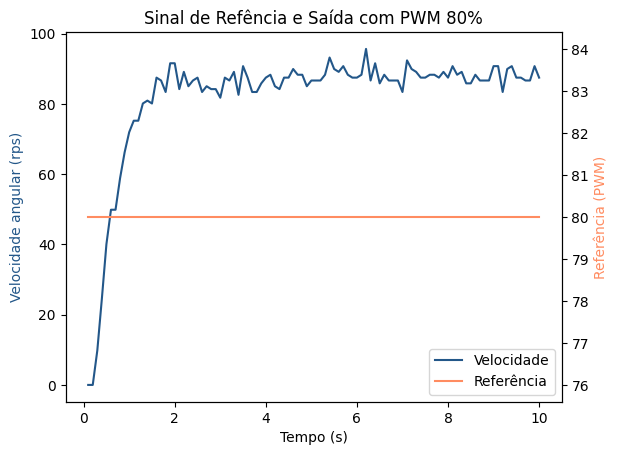

In [495]:
x = data_frame['Time'] #eh o mesmo tempo para todos
f80 = data_frame1['Setpoint']
g80 = data_frame2['Velocity']


fig, ax1 = plt.subplots()

# Plot the first function on the left Y-axis
ax1.plot(x, g80, linestyle='-',color='#235789', label='Velocidade')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Velocidade angular (rps)', color='#235789')

# Create the second Y-axis
ax2 = ax1.twinx()

# Plot the second function on the right Y-axis
ax2.plot(x, f80, linestyle='-',color='#FF8C61', label='Referência')
ax2.set_ylabel('Referência (PWM)', color='#FF8C61')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

# Show the plot
plt.title('Sinal de Refência e Saída com PWM 80%')
plt.show()

Text(0.5, 1.0, 'Distribuição de velocidade com PWM 80%')

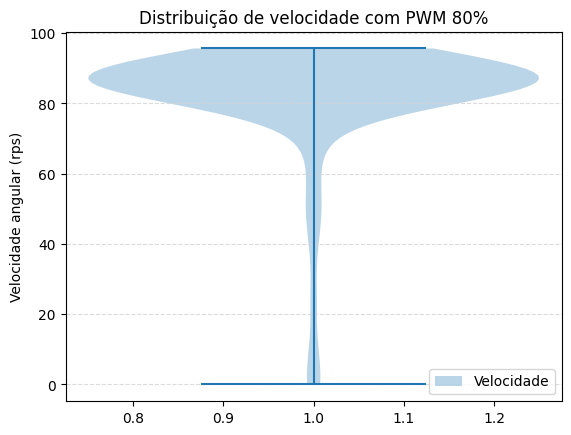

In [496]:
plt.violinplot(data_frame2['Velocity'])
plt.grid(True, axis='y', linestyle='--', color='lightgray', alpha=0.8)
#plt.xlabel('Tempo (s)') Será????
plt.ylabel('Velocidade angular (rps)')
plt.legend(['Velocidade'], loc='lower right')
plt.title('Distribuição de velocidade com PWM 80%')

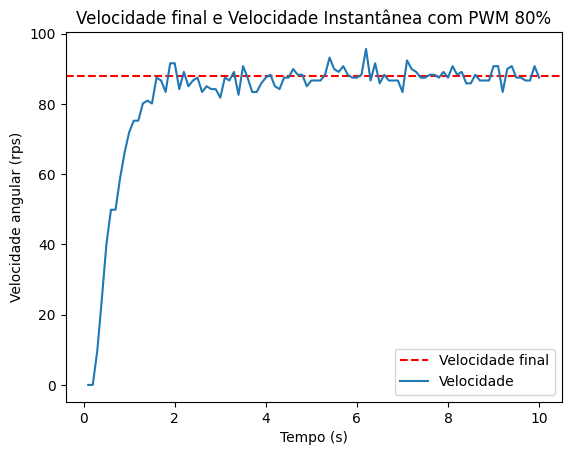

In [497]:
plt.axhline(y=pwm80_data['median'], color='r', linestyle='--')
plt.plot(data_frame2['Time'], data_frame2['Velocity'])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade angular (rps)')
plt.legend(['Velocidade final', 'Velocidade'], loc='lower right')
plt.title('Velocidade final e Velocidade Instantânea com PWM 80%')
plt.show()

# PWM 90%

In [498]:
file_path = '/content/degmotor90.dat'

# Read the .dat file into a pandas DataFrame
data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])

<ipython-input-498-f6b0f44339cf>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])


In [499]:
# Aqui vamos criar um data framework para cada conjunto:
# tempo x setpoint e tempo x velocidade
# A escolha se justifica pois em malha fechada ambos variam e
# dessa forma precisamos lidar com duas variáveis de forma separada
# (MATLAB consegue separar isso 'por trás dos panos')

data_frame1 = pd.DataFrame()
data_frame2 = pd.DataFrame()

data_frame1['Time'] = data_frame['Time']
data_frame1['Setpoint'] = data_frame['Setpoint']

data_frame2['Time'] = data_frame['Time']
data_frame2['Velocity'] = data_frame['Velocity']

In [500]:
data_frame1.head()

,Time,Setpoint
0,0.1,90.0
1,0.2,90.0
2,0.3,90.0
3,0.4,90.0
4,0.5,90.0


In [501]:
data_frame2.head()

,Time,Velocity
0,0.1,0.00
1,0.2,1.63
2,0.3,16.34
3,0.4,16.34
4,0.5,34.33


In [502]:
pwm90_data = {}

N = 15 #numero de amostrar para computar a media
t_sampling = 0.1

#obtendo o valor medio
pwm90_data['median'] = 1/N*sum(data_frame2['Velocity'].tail(N))

#obtendo o instante de tempo onde atinge a velocidade final (media anterior) pela primeira vez
pwm90_data['response_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm90_data['median']).idxmax()

# obtendo a constante de tempo da planta
pwm90_data['time_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm90_data['median']*0.639).idxmax()

#obtendo o tempo de assentamento no criterio de 2%
pwm90_data['settling time'] = t_sampling*data_frame2['Velocity'].ge(pwm90_data['median']*0.98).idxmax()

#otendo o overshoot em %
pwm90_data['overshoot'] = (data_frame2['Velocity'].max()-pwm90_data['median'])/pwm90_data['median']*100

# obtendo o ganho DC
pwm90_data['DC gain'] = pwm90_data['median']/data_frame1['Setpoint'][0]

In [503]:
pwm90_data

{'median': 92.36466666666666,
 'response_constant': 1.5,
 'time_constant': 0.6000000000000001,
 'settling time': 1.5,
 'overshoot': 8.851147985882056,
 'DC gain': 1.0262740740740741}

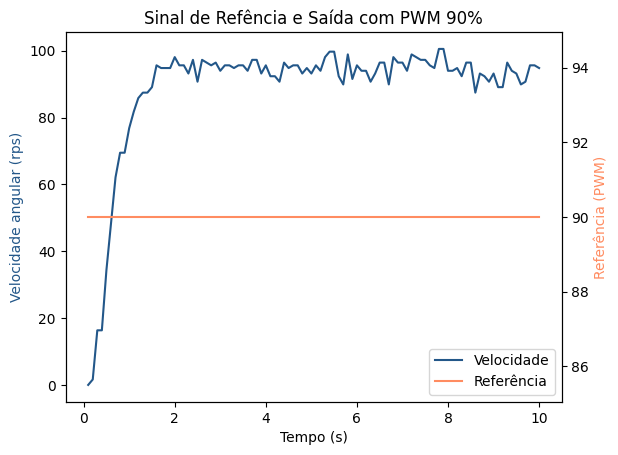

In [504]:
x = data_frame['Time'] #eh o mesmo tempo para todos
f90 = data_frame1['Setpoint']
g90 = data_frame2['Velocity']


fig, ax1 = plt.subplots()

# Plot the first function on the left Y-axis
ax1.plot(x, g90, linestyle='-',color='#235789', label='Velocidade')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Velocidade angular (rps)', color='#235789')

# Create the second Y-axis
ax2 = ax1.twinx()

# Plot the second function on the right Y-axis
ax2.plot(x, f90, linestyle='-',color='#FF8C61', label='Referência')
ax2.set_ylabel('Referência (PWM)', color='#FF8C61')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

# Show the plot
plt.title('Sinal de Refência e Saída com PWM 90%')
plt.show()

Text(0.5, 1.0, 'Distribuição de velocidade com PWM 90%')

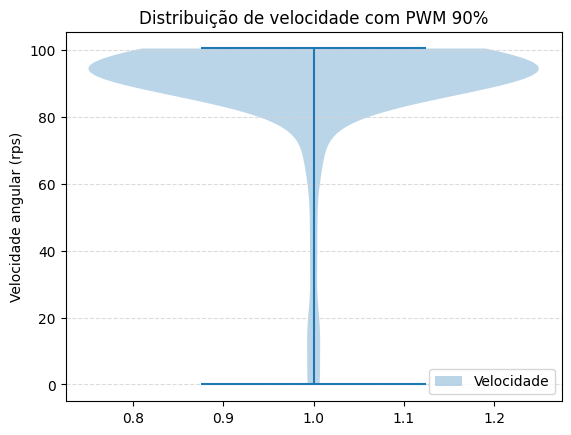

In [505]:
plt.violinplot(data_frame2['Velocity'])
plt.grid(True, axis='y', linestyle='--', color='lightgray', alpha=0.8)
#plt.xlabel('Tempo (s)') Será????
plt.ylabel('Velocidade angular (rps)')
plt.legend(['Velocidade'], loc='lower right')
plt.title('Distribuição de velocidade com PWM 90%')

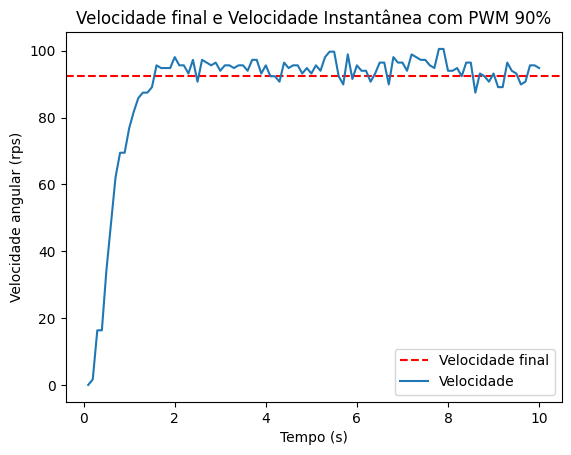

In [506]:
plt.axhline(y=pwm90_data['median'], color='r', linestyle='--')
plt.plot(data_frame2['Time'], data_frame2['Velocity'])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade angular (rps)')
plt.legend(['Velocidade final', 'Velocidade'], loc='lower right')
plt.title('Velocidade final e Velocidade Instantânea com PWM 90%')
plt.show()

# PWM 100%

In [507]:
file_path = '/content/degmotor100.dat'

# Read the .dat file into a pandas DataFrame
data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])

<ipython-input-507-66c4b207e2d6>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])


In [508]:
# Aqui vamos criar um data framework para cada conjunto:
# tempo x setpoint e tempo x velocidade
# A escolha se justifica pois em malha fechada ambos variam e
# dessa forma precisamos lidar com duas variáveis de forma separada
# (MATLAB consegue separar isso 'por trás dos panos')

data_frame1 = pd.DataFrame()
data_frame2 = pd.DataFrame()

data_frame1['Time'] = data_frame['Time']
data_frame1['Setpoint'] = data_frame['Setpoint']

data_frame2['Time'] = data_frame['Time']
data_frame2['Velocity'] = data_frame['Velocity']

In [509]:
data_frame1.head()

,Time,Setpoint
0,0.1,100.0
1,0.2,100.0
2,0.3,100.0
3,0.4,100.0
4,0.5,100.0


In [510]:
data_frame2.head()

,Time,Velocity
0,0.1,0.00
1,0.2,0.00
2,0.3,11.44
3,0.4,33.51
4,0.5,52.31


In [511]:
pwm100_data = {}

N = 15 #numero de amostrar para computar a media
t_sampling = 0.1

#obtendo o valor medio
pwm100_data['median'] = 1/N*sum(data_frame2['Velocity'].tail(N))

#obtendo o instante de tempo onde atinge a velocidade final (media anterior) pela primeira vez
pwm100_data['response_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm100_data['median']).idxmax()

# obtendo a constante de tempo da planta
pwm100_data['time_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm100_data['median']*0.639).idxmax()

#obtendo o tempo de assentamento no criterio de 2%
pwm100_data['settling time'] = t_sampling*data_frame2['Velocity'].ge(pwm100_data['median']*0.98).idxmax()

#otendo o overshoot em %
pwm100_data['overshoot'] = (data_frame2['Velocity'].max()-pwm100_data['median'])/pwm100_data['median']*100

# obtendo o ganho DC
pwm100_data['DC gain'] = pwm100_data['median']/data_frame1['Setpoint'][0]

In [512]:
pwm100_data

{'median': 97.10666666666667,
 'response_constant': 1.7000000000000002,
 'time_constant': 0.6000000000000001,
 'settling time': 1.6,
 'overshoot': 6.903061925030894,
 'DC gain': 0.9710666666666667}

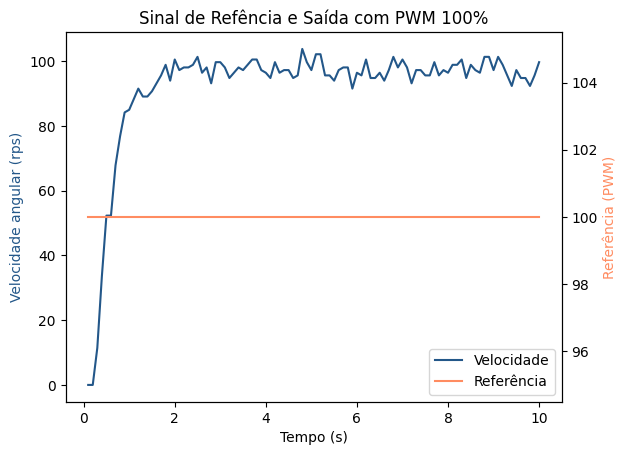

In [513]:
x = data_frame['Time'] #eh o mesmo tempo para todos
f100 = data_frame1['Setpoint']
g100 = data_frame2['Velocity']


fig, ax1 = plt.subplots()

# Plot the first function on the left Y-axis
ax1.plot(x, g100, linestyle='-',color='#235789', label='Velocidade')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Velocidade angular (rps)', color='#235789')

# Create the second Y-axis
ax2 = ax1.twinx()

# Plot the second function on the right Y-axis
ax2.plot(x, f100, linestyle='-',color='#FF8C61', label='Referência')
ax2.set_ylabel('Referência (PWM)', color='#FF8C61')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

# Show the plot
plt.title('Sinal de Refência e Saída com PWM 100%')
plt.show()

Text(0.5, 1.0, 'Distribuição de velocidade com PWM 100%')

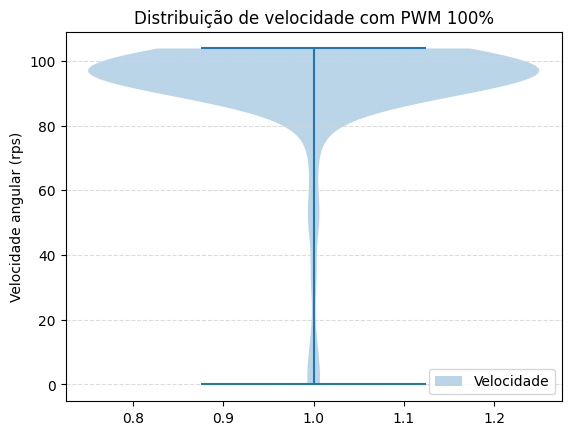

In [514]:
plt.violinplot(data_frame2['Velocity'])
plt.grid(True, axis='y', linestyle='--', color='lightgray', alpha=0.8)
#plt.xlabel('Tempo (s)') Será????
plt.ylabel('Velocidade angular (rps)')
plt.legend(['Velocidade'], loc='lower right')
plt.title('Distribuição de velocidade com PWM 100%')

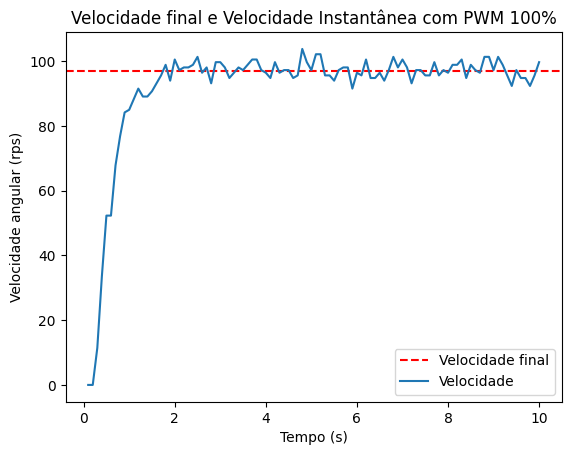

In [515]:
plt.axhline(y=pwm100_data['median'], color='r', linestyle='--')
plt.plot(data_frame2['Time'], data_frame2['Velocity'])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade angular (rps)')
plt.legend(['Velocidade final', 'Velocidade'], loc='lower right')
plt.title('Velocidade final e Velocidade Instantânea com PWM 100%')
plt.show()

# Comparativo

Iremos agora fazer exercicio de um comparativo entre as diferentes constantes de ganho DC e da constante de tempo para cada entradas, sendo elas - as exigidas - de 20%, 30%, 60% e 90%.

In [516]:
systems_gain = [pwm20_data['DC gain'], pwm30_data['DC gain'], pwm60_data['DC gain'], pwm90_data['DC gain']]
systems_time = [pwm20_data['time_constant'], pwm30_data['time_constant'], pwm60_data['time_constant'], pwm90_data['time_constant']]

labels = ['20%','30%','60%','90%']

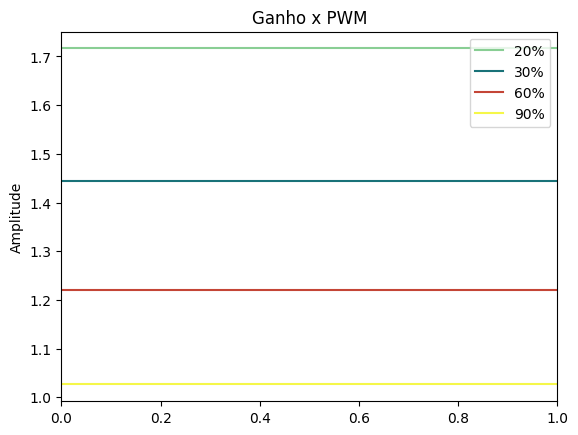

In [517]:
plt.axhline(systems_gain[0], color='#89CE94', label=labels[0])
plt.axhline(systems_gain[1], color='#197278', label=labels[1])
plt.axhline(systems_gain[2], color='#C44536', label=labels[2])
plt.axhline(systems_gain[3], color='#F5F749', label=labels[3])

plt.ylabel('Amplitude')
plt.title('Ganho x PWM')
plt.legend()
plt.show()

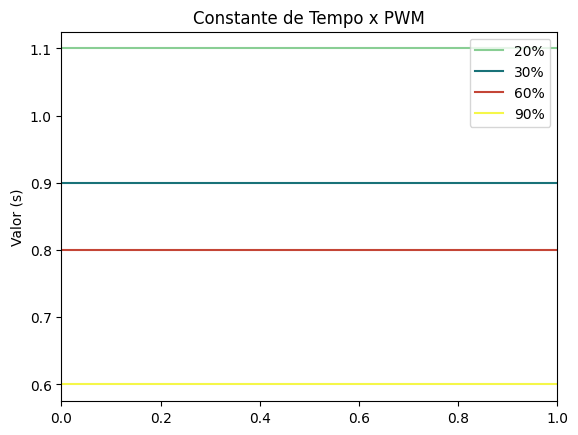

In [519]:
plt.axhline(systems_time[0], color='#89CE94', label=labels[0])
plt.axhline(systems_time[1], color='#197278', label=labels[1])
plt.axhline(systems_time[2], color='#C44536', label=labels[2])
plt.axhline(systems_time[3], color='#F5F749', label=labels[3])

plt.ylabel('Valor (s)')
plt.title('Constante de Tempo x PWM')
plt.legend()
plt.show()